In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

plt.style.use('dark_background')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = sns.color_palette('deep'))
plt.rcParams['figure.figsize'] = (20 , 10)


In [18]:
words = open('names.txt' , 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

# bigrams


In [19]:
# create a dictionary of bigrams
bigrams = {}
for word in words:
    chars = ["<S>"] + list(word) + ["<E>"]
    for c1 , c2 in zip(chars , chars[1:]):
        bigram = (c1 , c2)
        bigrams[bigram] = bigrams.get(bigram , 0) + 1

sorted(bigrams.items() , key = lambda x: x[1] , reverse = True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [20]:
def plot_bigram(bigrams , itc):
    plt.figure(figsize=(20 , 20))
    plt.imshow(bigrams , cmap = 'Blues')
    for i in range(bigrams.shape[0]):
        for j in range(bigrams.shape[1]):
            text = itc[i] + itc[j]
            plt.text(j , i , text , ha = 'center' , va = 'bottom' , color = 'grey')
            plt.text(j , i , bigrams[i , j].item() , ha = 'center' , va = 'top' , color = 'red')

    plt.axis('off')
    plt.show()

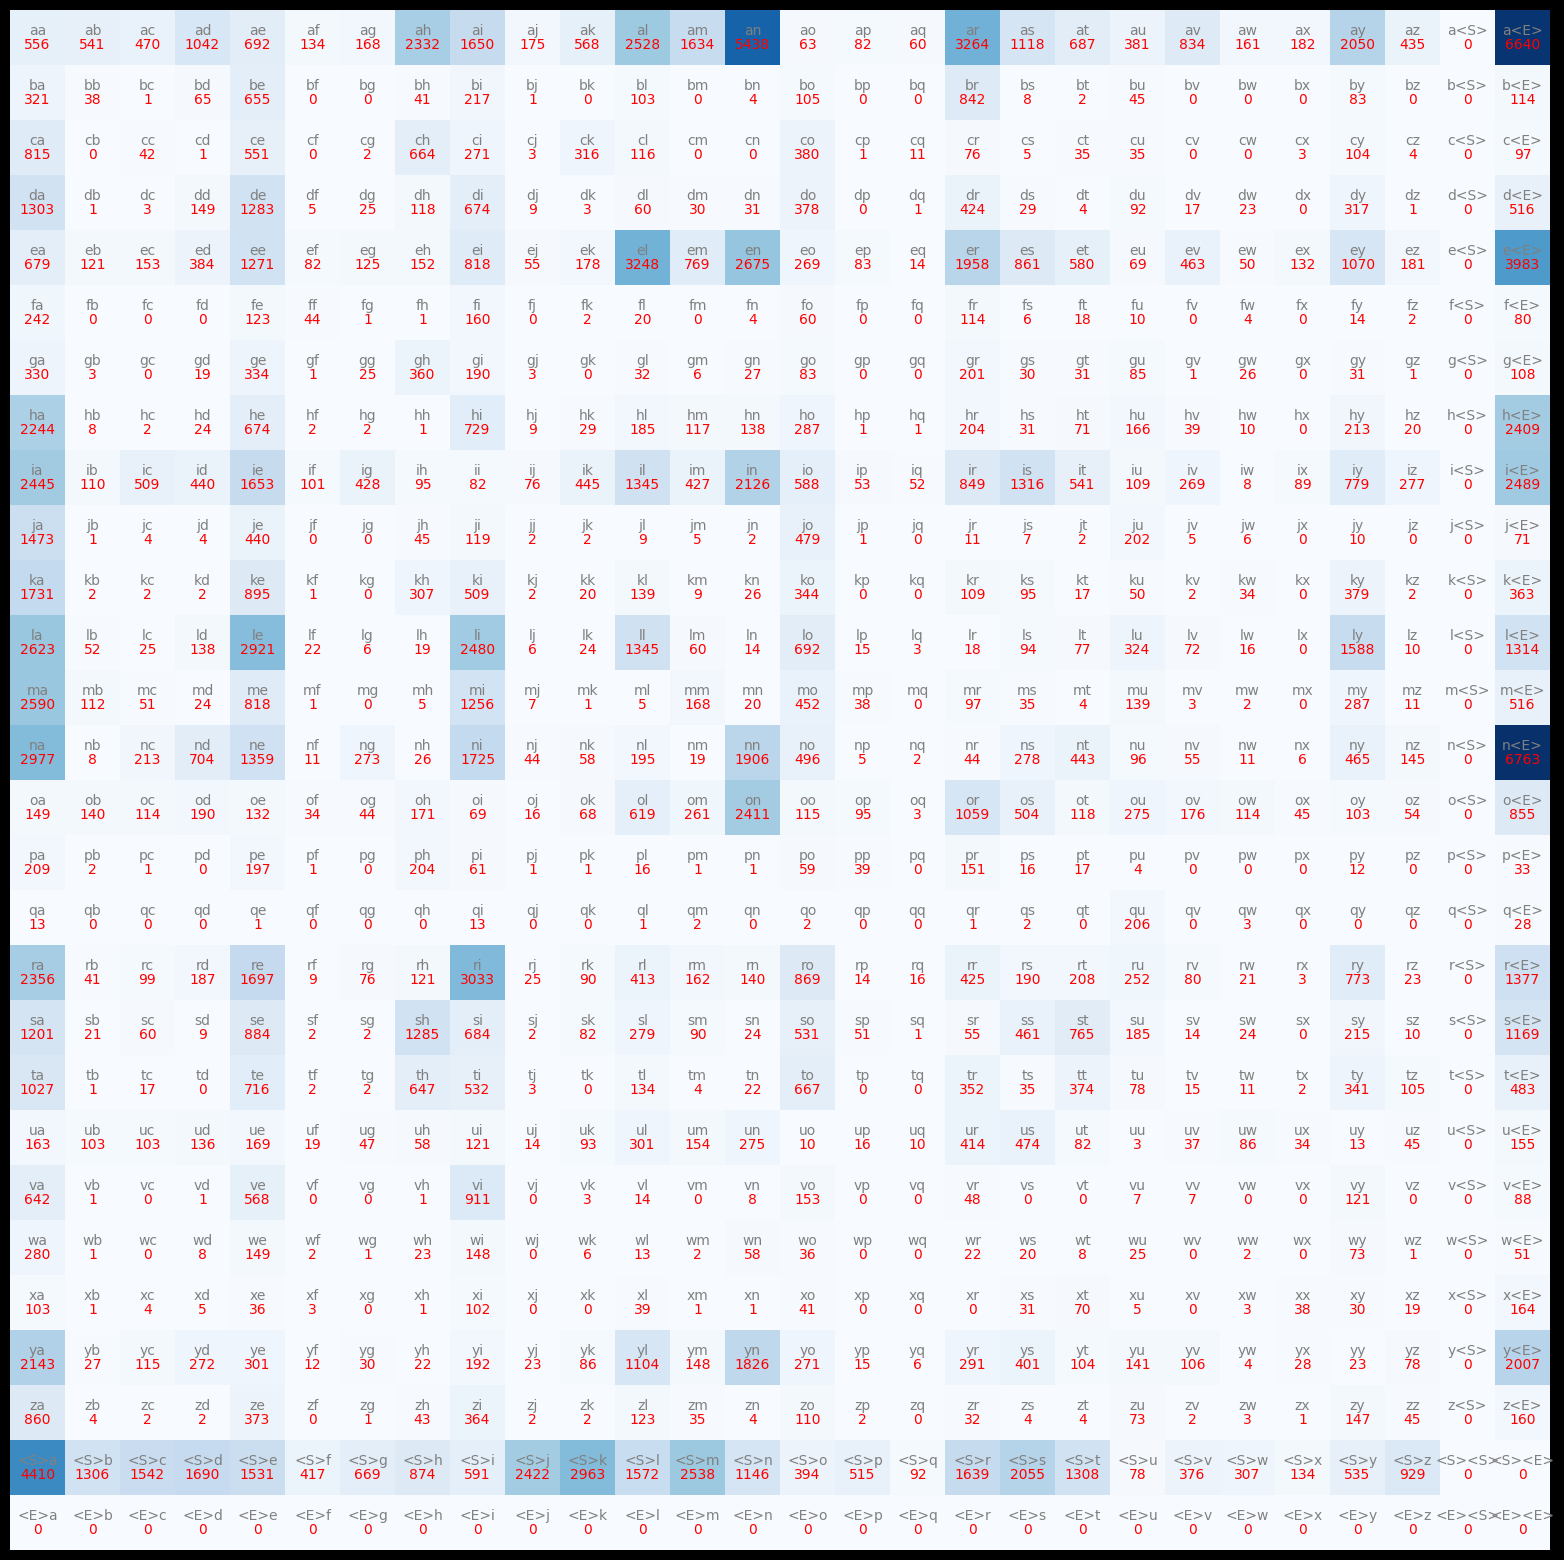

In [21]:
# # create a tensor to represent bigrams:
# # row index -> first character , col index -> second character

# create mapping from character to integer
cti = {chr(i) : i - 97 for i in range(97 , 97 + 26)}
cti['<S>'] = 26
cti['<E>'] = 27
itc = {val : key for key , val in cti.items()}
# print(f"{cti}")

n = len(cti.keys())
bigrams = torch.zeros((n , n) , dtype = torch.int32)
for word in words:
    chars = ['<S>'] + list(word) + ['<E>']
    for c1 , c2 in zip(chars , chars[1:]):
        bigrams[cti[c1] , cti[c2]]+=1

plot_bigram(bigrams , itc)

## replace helucination characters \<s\> and \<e\> with a single "." character.


In [23]:
cti = {chr(i + 97) : i + 1 for i in range(26) }
cti['.'] = 0
itc = {j : i for i , j in cti.items()}
itc

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

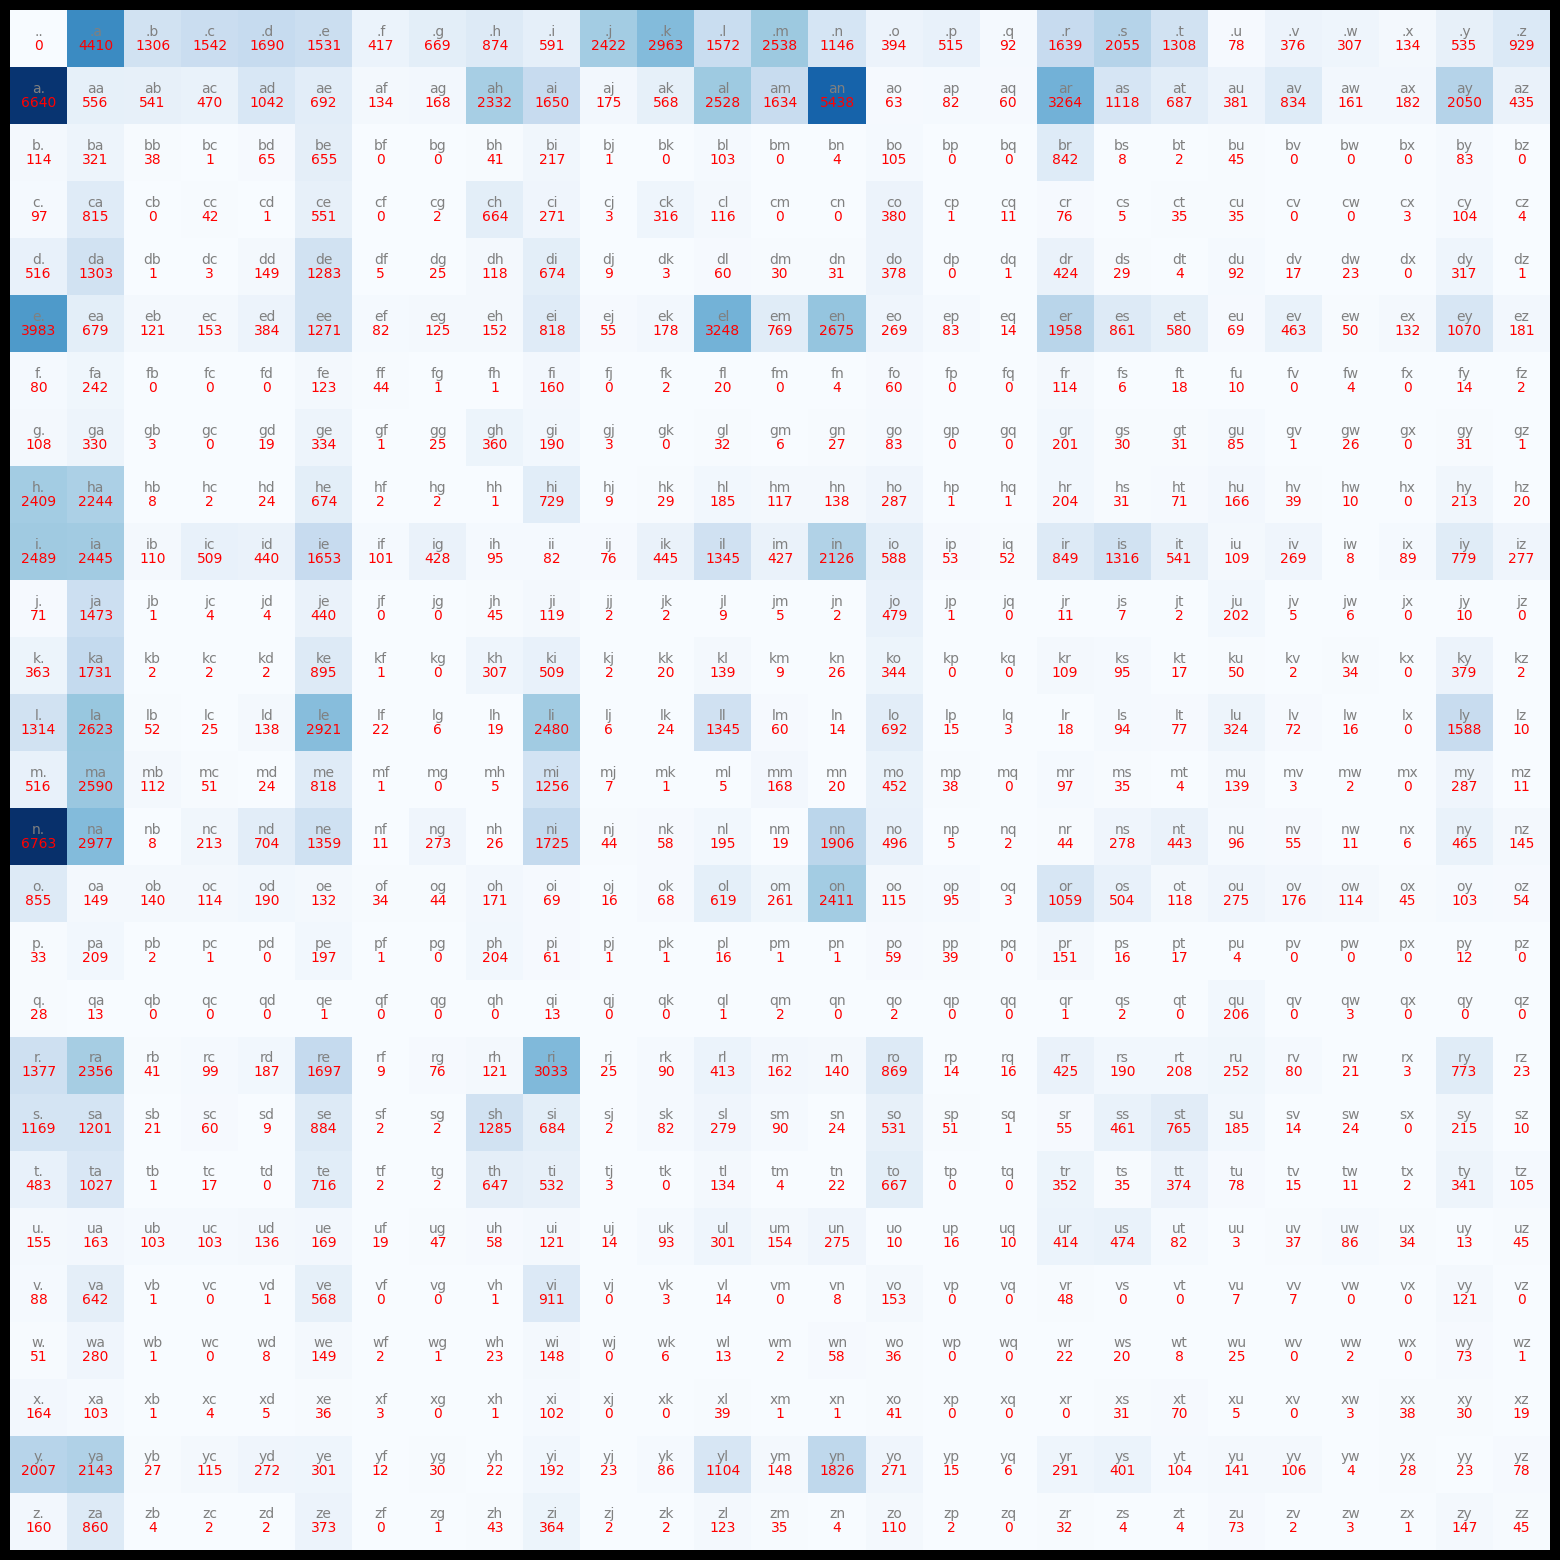

In [24]:
bigrams = torch.zeros((27 , 27) , dtype = torch.int32)
for word in words:
    chars = ['.'] + list(word) + ['.']
    for x , y  in zip(chars , chars[1:]):
        bigrams[cti[x] , cti[y]]+=1

plot_bigram(bigrams , itc)

## torch generator and sampling using torch.mltinomial


In [25]:
gen = torch.Generator().manual_seed(23)
p = torch.rand(3 , generator= gen)
p = (p + 1) / p.sum()
id = torch.multinomial(p , num_samples= 1 , replacement= True , generator = gen).item()
itc[id]

'b'

In [26]:
gen = torch.Generator().manual_seed(2400)
for i in range(20):
    out = []
    idx = 0
    while True:
        p = bigrams[idx]
        p = p / p.sum()
        idx = torch.multinomial(p , num_samples= 1 , replacement= True , generator = gen).item()
        out.append(itc[idx])
        if idx == 0:
            break
    print("".join(out))

janaisha.
ca.
a.
a.
rgey.
sacyan.
inelviaiay.
ta.
riativierislyr.
kkakin.
h.
myo.
eewt.
jaylisiatne.
maseryah.
a.
emmavizanevyliya.
sh.
lez.
jamad.


## optimize the count matrix -> normalize it:


In [27]:
itc

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [46]:
p = bigrams.float()
p = p / p.sum(dim = 1 , keepdim= True)

#generate 10 names:
for i in range(20):
    out = []
    id = 0
    while True:
        id = torch.multinomial(p[id] , num_samples = 1 , replacement = True , generator = gen).item()
        out.append(itc[id])
        if id == 0:
            break
    print("".join(out))

ryossodakebdrzemarale.
han.
zydanaiena.
e.
a.
thinse.
hn.
talelttha.
jon.
kala.
silayaay.
ah.
bse.
sh.
meni.
roimmitha.
ayagelefa.
kar.
di.
dayliqumya.


In [29]:
#calculate negative log liklihood of the bigram model:

liklihood = 1
llhood = 0
n = 0
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1 , ch2 , in zip(chs , chs[1:]):
        prob = p[cti[ch1] , cti[ch2]]
        lprob = torch.log(prob)
        liklihood *= prob.item()
        llhood += lprob
        n += 1
        # print(f"{ch1 , ch2}, {prob :.4f}")
print(f"liklihood: {liklihood :.4f} , log-liklihood: {llhood :.4f} , negative-log-liklihood: {-llhood / n :.4f}")

liklihood: 0.0000 , log-liklihood: -559891.7500 , negative-log-liklihood: 2.4541


# Neural Network:


In [33]:
#construct dataset:
from torch.nn.functional import one_hot
xs , ys = [] , []
for word in words:
    chars = ['.'] + list(word) + ['.']
    for ch1 , ch2 in zip(chars , chars[1:]):
        i1 = cti[ch1]
        i2 = cti[ch2]
        xs.append(i1)
        ys.append(i2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
nsamples = xs.nelement()
print(f"# of samples: {nsamples}")

#plot the one-hot vector for the word:
from torch.nn.functional import one_hot

xenc = one_hot(xs , num_classes= 27).float()

# plt.imshow(xenc)
# for i in range(xenc.shape[0]):
#     for j in range(xenc.shape[1]):
#         if xenc[i][j] == 1:
#             plt.text(j , i , f"{itc[j]}" , color = 'green' , fontsize = 20)

# of samples: 228146


In [34]:
# initialize weights of the nn
w = torch.randn((27 , 27) , requires_grad= True , generator= gen)
(w**2).mean()

tensor(0.9848, grad_fn=<MeanBackward0>)

In [47]:
w = torch.randn((27 , 27) , requires_grad= True , generator= gen)
#training:
k = 200
for i in range(k):
    logits = xenc @ w
    counts = logits.exp()
    probs = counts / counts.sum(dim = 1 , keepdim= True)

    #compute loss:
    loss = -probs[torch.arange(xenc.shape[0]) , ys].log().mean() + 0.01 * (w**2).mean()
    print(f"{loss.item()}")
    w.grad = None
    loss.backward()

    #update weights:
    w.data += -50 * w.grad

3.659367322921753
3.2995190620422363
3.101357936859131
2.9785664081573486
2.8924477100372314
2.829531192779541
2.7826972007751465
2.746908187866211
2.718629837036133
2.6955604553222656
2.676283597946167
2.659902811050415
2.645808219909668
2.633558988571167
2.6228229999542236
2.6133408546447754
2.6049060821533203
2.597353219985962
2.590547561645508
2.584380865097046
2.5787646770477295
2.573627233505249
2.568908929824829
2.564561128616333
2.5605430603027344
2.5568203926086426
2.5533626079559326
2.550145149230957
2.5471456050872803
2.544344186782837
2.5417239665985107
2.53926944732666
2.536966562271118
2.5348024368286133
2.532766819000244
2.5308496952056885
2.529040813446045
2.527331829071045
2.5257163047790527
2.524186611175537
2.522735834121704
2.521359443664551
2.5200514793395996
2.5188076496124268
2.5176234245300293
2.5164947509765625
2.5154178142547607
2.5143892765045166
2.513406991958618
2.5124669075012207
2.511566638946533
2.510704278945923
2.5098772048950195
2.5090837478637695
2.5

In [59]:
#sample text from the trained network:
for i in range(10):
    id = 0
    out = []
    while(True):
        oneh = torch.nn.functional.one_hot(torch.tensor(id) , num_classes= 27).float().reshape((-1, 27))
        # print(oneh.shape)
        logit = oneh @ w
        counts = logit.exp()
        # print(f"{counts.shape}")
        p = counts / counts.sum(dim = 1 , keepdim= True)

        id = torch.multinomial(p , num_samples= 1 , replacement= True , generator= gen).item()
        out.append(itc[id])
        if id == 0:
            break
    print("".join(out))



ha.
meirthvi.
cylanieysh.
thamy.
saya.
rilonah.
mieliclaverieey.
riam.
t.
a.
